**Exploration Data Analyisis**

In [1]:
#library untuk analisis data  
import pandas as pd 
import numpy as np
import csv
import nltk
import tensorflow as tf

#library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
from matplotlib import ticker
%config InlineBackend.figure_format = 'svg' 

In [2]:
#Meload dataset
import pandas as pd

df = pd.read_csv("SINGGALANG.tsv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
print(df)

                    0             1
0                  Ia             O
1            menjabat             O
2             sebagai             O
3            Presiden             O
4              ketiga             O
...               ...           ...
1478263            di             O
1478264      kalangan             O
1478265       pelajar             O
1478266  Muhammadiyah  Organisation
1478267             .             O

[1478268 rows x 2 columns]


In [3]:
#Menampilkan 5 data teratas
df.head()

,0,1
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [4]:
#Menampilkan statistik deskriptif 
df.describe()

,0,1
count,1478248,1478268
unique,100837,4
top,",",O
freq,88144,1340023


In [5]:
#Mengecek jumlah baris dan jumlah dolom dalam dataset
df.shape

(1478268, 2)

In [6]:
#Mengecek tipe data setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478268 entries, 0 to 1478267
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1478248 non-null  object
 1   1       1478268 non-null  object
dtypes: object(2)
memory usage: 22.6+ MB


In [7]:
#Mengecek data yang unik
df.nunique()

0    100837
1         4
dtype: int64

In [8]:
list_kalimat = []
nomor_kalimat = 1


with open('/content/SINGGALANG.tsv', encoding='UTF-8') as read_obj:
    # Memberikan objek file ke reader() untuk mendapatkan objek pembaca
    csv_reader = csv.reader(read_obj, delimiter='\t', quotechar=None)
    #Menginstruksikan reader untuk tidak melakukan pemrosesan khusus terhadap karakter kutipan
    #Melakukan iterasi pada tiap  baris dalam csv dengan menggunakan objek pembaca
    for row in csv_reader:
        #variabel baris merupakan daftar yang mewakili baris dalam csv
        if len(row) == 0:
            nomor_kalimat += 1 
        else:
            tmp_row= row
            tmp_row.append(nomor_kalimat)
            list_kalimat.append(tmp_row)

dataset = pd.DataFrame(list_kalimat, columns=['token', 'entitas bernama', 'kalimat'])

In [9]:
#Melakukan pengambilan data untuk mendapatkan 10 baris teratas dari data 
dataset.head(10)

,token,entitas bernama,kalimat
0,Ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,Presiden,O,1
4,ketiga,O,1
5,Mesir,Place,1
6,pada,O,1
7,periode,O,1
8,15,O,1
9,Oktober,O,1


In [10]:
#Mendeklarasikan Class untuk mengambil kalimat dari dataset
class getsentence(object): #Melakukan deklarasi class dengan nama getsentence
    
    #Melakukan deklarasi "variabel" sebagai self. "variabel" merupakan objek dari class "getsentence"
    def __init__(self, data): 
      self.n_sent = 1.0
      self.dataset = dataset
      self.empty = False 
      
      #Lambda digunakan untuk mengembalikan nilai 
      agg_func = lambda s: [(t, e) for t, e in zip(s["token"].values.tolist(),
                                                 s["entitas bernama"].values.tolist())]                                           
      self.grouped = self.dataset.groupby("kalimat").apply(agg_func)
      self.sentences = [s for s in self.grouped]

In [11]:
#Getter adalah member function yang dipakai untuk menampilkan nilai data member
getter = getsentence(dataset)
kalimat = getter.sentences


print(kalimat[0]) #melakukan print kalimat pertama

[('Ia', 'O'), ('menjabat', 'O'), ('sebagai', 'O'), ('Presiden', 'O'), ('ketiga', 'O'), ('Mesir', 'Place'), ('pada', 'O'), ('periode', 'O'), ('15', 'O'), ('Oktober', 'O'), ('1970', 'O'), ('hingga', 'O'), ('terbunuhnya', 'O'), ('pada', 'O'), ('6', 'O'), ('Oktober', 'O'), ('1981', 'O'), ('.', 'O')]


In [12]:
#Len digunakan untuk mendapatkan panjang kalimat
longest_sen = max(kalimat, key=len)
longest_sen_len = len(longest_sen)

In [13]:
#Melakukan print jumlah kata panjang dalan kalimat
print (longest_sen_len)

490


In [14]:
#Melakukan print terhadapt kata yang terdapat pada kalimat
print (longest_sen)

[('Sejarah', 'O'), ('Asal', 'O'), ('Usul', 'O'), ('Desa', 'O'), ('ArjawinangunDiceritakan', 'O'), ('dalam', 'O'), ('alam', 'O'), ('pengembaraannya', 'O'), ('untuk', 'O'), ('mencari', 'O'), ('dan', 'O'), ('memperdalam', 'O'), ('agama', 'O'), ('islam', 'O'), (',', 'O'), ('dua', 'O'), ('orang', 'O'), ('Pajajaran', 'Place'), ('Raden', 'O'), ('Walangsungsng', 'O'), ('dan', 'O'), ('Adiknya', 'O'), ('Nyi', 'O'), ('Rarasantang', 'O'), (',', 'O'), ('sampai', 'O'), ('ke', 'O'), ('Mesir', 'Place'), ('menunaikan', 'O'), ('Ibadah', 'O'), ('Haji', 'O'), (',', 'O'), ('Raden', 'O'), ('Walangsungsang', 'O'), ('pulang', 'O'), ('ke', 'O'), ('Cirebon', 'Place'), ('dengan', 'O'), ('sebutan', 'O'), ('Haji', 'O'), ('Abdullah', 'Person'), ('Iman', 'O'), (',', 'O'), ('sedangkan', 'O'), ('adiknyaNyi', 'O'), ('Rarasantang', 'O'), ('tetap', 'O'), ('berada', 'O'), ('di', 'O'), ('Mesir', 'Place'), ('karena', 'O'), ('telah', 'O'), ('bersuami', 'O'), ('dengan', 'O'), ('Syarif', 'O'), ('Abdullah', 'Person'), ('seorang

In [15]:
#Len digunakan untuk mendapatkan panjang kalimat
shortest_sen = min(kalimat, key=len)
shortest_sen_len = len(shortest_sen)

In [16]:
#Melakukan print jumlah kata pendek dalan kalimat
print (shortest_sen_len)

2


In [17]:
#Melakukan print terhadapt kata yang terdapat pada kalimat
print (shortest_sen)

[('III/S', 'O'), ('.', 'O')]


In [18]:
#Melakukan penjumlahan terhadap kalimat
print("Jumlah kalimat: ", len(dataset.groupby(['kalimat'])))
#Melakukan penjumlahan kata yang unik didalam kalimat
words = list(set(dataset["token"].values))
n_words = len(words)
print("Jumlah kata unik : ", n_words)
#Melakukan pengelompokan kategori entitas bernama
tags = list(set(dataset["entitas bernama"].values))
print("Entitas bernama:", tags)
#Melakukan penjumlahan terhadap kategori entitas bernama
n_tags = len(tags)
print("Jumlah entitas bernama: ", n_tags)

Jumlah kalimat:  48957
Jumlah kata unik :  100839
Entitas bernama: ['Place', 'Person', 'Organisation', 'O']
Jumlah entitas bernama:  4


In [19]:
#Mendapatkan kata dengan urutan n teratas yang memiliki entitas bernama PLace
dataset.loc[dataset['entitas bernama'] == 'Place', 'token'].head()

5        Mesir
29       Mesir
47       Mesir
68    Kerajaan
70       Kairo
Name: token, dtype: object

In [20]:
#Mendapatkan kata dengan indeks tertentu dengan menggunakan illoc
dataset.iloc[220085] 

token              Propinsi
entitas bernama           O
kalimat                7303
Name: 220085, dtype: object

In [21]:
#Mendapatkan kata dengan urutan n teratas yang memiliki entitas bernama Person
dataset.loc[dataset['entitas bernama'] == 'Person', 'token'].head()

38     Sadat
100    Anwar
101    Sadat
105    Hafez
107    Assad
Name: token, dtype: object

In [22]:
#Mendapatkan kata dengan urutan n teratas yang memiliki entitas bernama Organization
dataset.loc[dataset['entitas bernama'] == 'Organisation', 'token'].head()

568    Universitas
569      Indonesia
711     Independen
778    Universitas
779         Gadjah
Name: token, dtype: object

In [23]:
#Mendapatkan kata dengan urutan n teratas yang memiliki entitas bernama O
dataset.loc[dataset['entitas bernama'] == 'O', 'token'].head()

0          Ia
1    menjabat
2     sebagai
3    Presiden
4      ketiga
Name: token, dtype: object

In [24]:
#Melakukan perhitungan tiap kategori pada entitas bernama
dataframe = dataset.groupby("entitas bernama" )
dataframe["entitas bernama"].count()

entitas bernama
O               1340023
Organisation      14770
Person            41297
Place             82178
Name: entitas bernama, dtype: int64

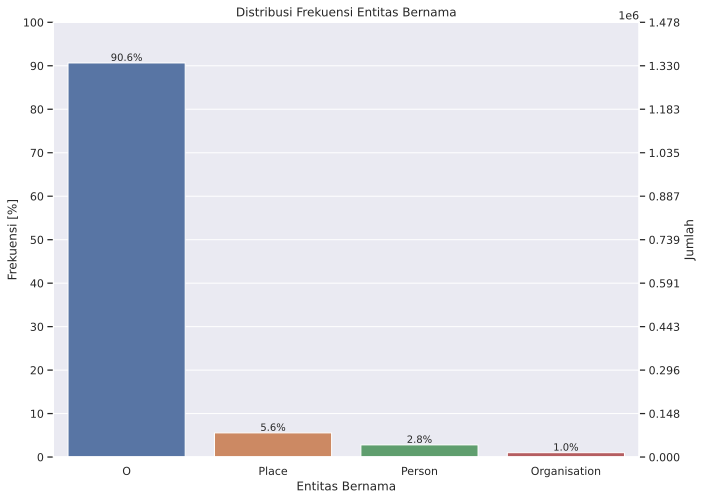

In [25]:
#Membuat diagram distribusi frekuensi Entitas Bernama
ncount = len(dataset)

plt.figure(figsize=(10.5, 8))
ax = sns.countplot(x = "entitas bernama", data = dataset)
plt.title('Distribusi Frekuensi Entitas Bernama')
plt.xlabel('Entitas Bernama')

# Membuat twin axis
ax2 = ax.twinx()

# Melakukan pertukaran agar count axis di kanan, frekuensi di kiri
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Melakukan pertukaran label
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Jumlah')
ax2.set_ylabel('Frekuensi [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha = 'center', va = 'bottom') # atur alignment teks

# Menggunakan LinearLocator untuk memastikan jumlah tick yang benar
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Melakukan perbaikan rentang frekuensi menjadi 0-100
ax2.set_ylim(0, 100)
ax.set_ylim(0, ncount)

# Menggunakan MultipleLocator untuk memastikan spasi antar-tick yaitu 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Mengatur Agar grid pada ax2 off, supaya gridlines tidak ditampilkan pada bagian atas bar
ax2.grid(None)

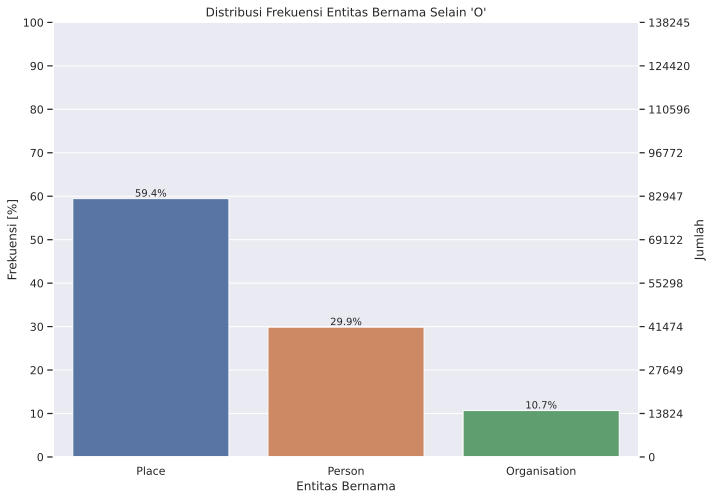

In [26]:
#Membuat diagram distribusi frekuensi Entitas Bernama selain 'O'
ncount = len(dataset.loc[dataset['entitas bernama'] != 'O'])

plt.figure(figsize=(10.5, 8))
ax = sns.countplot(x = "entitas bernama", data = dataset.loc[dataset['entitas bernama'] != 'O'])
plt.title('Distribusi Frekuensi Entitas Bernama Selain \'O\'')
plt.xlabel('Entitas Bernama')

# Membuat twin axis
ax2 = ax.twinx()

# Melakukan pertukaran agar count axis di kanan, frekuensi di kiri
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Melakukan pertukaran label
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Jumlah')
ax2.set_ylabel('Frekuensi [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha = 'center', va = 'bottom') # Mengatur alignment teks

# Menggunakan LinearLocator untuk memastikan jumlah tick yang benar
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Melakukan perbaikan rentang frekuensi menjadi 0-100
ax2.set_ylim(0, 100)
ax.set_ylim(0, ncount)

# Menggunakan MultipleLocator untuk memastikan spaci antar-tick yaitu 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Atur sehingga grid pada ax2 off, supaya gridlines tidak ditampilkan pada bagian atas bar
ax2.grid(None)

In [27]:
# Menampilkan 20 token pertama yang paling banyak muncul 
dataset['token'].value_counts()[:20]

,          88144
.          49109
dan        37283
di         33701
yang       29353
-LRB-      19843
-RRB-      19736
''         15906
``         15232
dengan     15231
pada       15021
dari       14900
tahun      13079
sebagai     9038
ini         8371
untuk       8297
dalam       8266
adalah      7950
menjadi     7414
oleh        5974
Name: token, dtype: int64

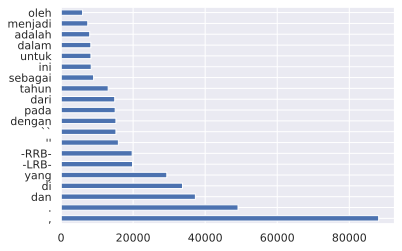

In [28]:
# Melakukan visualisasi terhadap data 20 token yang paling banyak muncul
dataset['token'].value_counts()[:20].plot(kind='barh')

In [29]:
 #Melakukan import library untuk melihat url yang muncul pada dataset
 import re 
  
def Find(string): 
  
    # findall() has been used  
    # with valid conditions for urls in string 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)       
    return [x[0] for x in url] 
      
# Mendapatkan url dari dataset 
dataset_url = open('SINGGALANG.tsv').read()
print("Urls: ", Find(dataset_url)) 

Urls:  ['www.ultimatejlo.com', 'http://karyatani.webs.com', 'www.4icu.org/id/', 'http://www.cousteau.org', 'http://www.unigha.ac.id', 'http://www.garukgak.co.cc/', 'https://groups.yahoo.com/neo/groups/Dharmajala/conversations/topics/7355', 'www.lentera.org', 'www.beritasatu.tv', 'www.beritasatu.com', 'http://informasijambi.blogspot.co.id/2010/03/riwayat-hidup-h-zulkifli-nurdin.html', 'www.akuntansi.usm.ac.id', 'http://raisa.flagig.com', 'www.geocities.com/smanegeri3palembang']


In [30]:
 # Melakukan penghitungan jumlah punctuation
dataset_punct = open('SINGGALANG.tsv').read()

dataset_punct  = dataset_punct.replace("--", " ")

for symbol in "-'":
   dataset_punct  = dataset_punct.replace(symbol + " ", "")
   dataset_punct  = dataset_punct.replace(" " + symbol, "")

for symbol in ".,/'-":
    print (symbol, dataset_punct.count(symbol)) 

. 57483
, 89240
/ 3462
' 33811
- 96947


**Data Preprocessing**

### 1. Data Cleaning

In [31]:
#Melakukan pengecekan Missing Value dengan fungsi isna()
df.isna()

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1478263,False,False
1478264,False,False
1478265,False,False
1478266,False,False


In [32]:
#Melakukan Perhitungan Jumlah Missing Value
df.isna().sum()

0    20
1     0
dtype: int64

In [33]:
#Melakukan drop terhadap Missing Value
df.dropna(inplace=True)
df.isnull().sum()

0    0
1    0
dtype: int64

In [34]:
#Mengecek data yang missing
C = (df.dtypes =='object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes =='int64')
Float = (df.dtypes =='float64')
NumbericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " +str(round(Missing_Percentage,5)) + " % ")

The number of missing entries before cleaning: 0.0 % 


In [35]:
#Melakukan pengambilan data untuk mendapatkan n baris terakhir dari data
dataset.tail()

,token,entitas bernama,kalimat
1478263,di,O,48957
1478264,kalangan,O,48957
1478265,pelajar,O,48957
1478266,Muhammadiyah,Organisation,48957
1478267,.,O,48957


In [36]:
#Melakukan pengecekan info dasar dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478268 entries, 0 to 1478267
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   token            1478268 non-null  object
 1   entitas bernama  1478268 non-null  object
 2   kalimat          1478268 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.8+ MB


### 2. Expand Contraction

In [37]:
dataset_prep = pd.DataFrame(list_kalimat, columns=['token', 'entitas bernama', 'kalimat'])

In [38]:
# Memperbaiki format penulisan 
# re.search = mencari pola itu di dalam string.
def perbaikan_format_tanda_baca(dataset_prep):    
    for i in dataset_prep.index:
        token = re.sub('([.,!?()])', r'\1 ', dataset_prep.at[i, 'token'])
        dataset_prep.at[i, 'token'] = re.sub('\s{2,}', ' ', token)
    return dataset_prep
perbaikan_format_tanda_baca(dataset_prep)

,token,entitas bernama,kalimat
0,Ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,Presiden,O,1
4,ketiga,O,1
...,...,...,...
1478263,di,O,48957
1478264,kalangan,O,48957
1478265,pelajar,O,48957
1478266,Muhammadiyah,Organisation,48957


In [39]:
dataset_prep.iloc[392707]

token                 , 
entitas bernama        O
kalimat            12975
Name: 392707, dtype: object

In [40]:
# menambahkan dictionary singkatan
import re
contractions_dict = {
"a.l. ": "antara lain",
"A.M.v.B. ": "Algemene Maatregel van Bestuur",
"a.n. ": "atas nama",
"adm. ": "administrasi",
"UU " : "undang-undang",
"art. ": "artikel",
"Ass. Supt. ":"asisten superintenden",
"B.A. ": "Bachelor of Arts",
"B.B.A. ": "Bachelor of Business Administration",
"B.Ch.E ": "Bachelor of Chemical Engineering",
"B.Sc. ": "Bachelor of Science",
"Bpk. ": "Bapak",
"BRAy. ": "Bendara Raden Ayu",
"CC ": "carbon copy",
"D.Sc. ": "doctor of science",
"dkk. ": "dan kawan-kawan",
"dll. ": "dan lain-lain",
"Dr.h.c ": "Doctor Honoris Causa",
"Dr.Phil. ": "Doctor of Philosophy",
"Dr.Th. ": "Doctor Theologiae",
"dr. ": "dokter medis (profesi)",
"Dr. ": "Doktor (gelar akademik)",
"Dra. ": "Doktoranda",
"Drg. ": "Dokter Gigi",
"drh. ": "dokter hewan",
"Drs. ": "Doktorandus",
"dsb. ": "dan lain sebagainya", 
"dsb. " : "dan sebagainya",
"dst. ": "dan seterusnya",
"E.Z. ": "Economische Zaken",
"ed. ": "editor", 
"ed. ": "edisi",
"faks. " : "faksimile",
"fol. " : "folio",
"Fr. " : "frater",
"Gg. " : "gang",
"gg. " : "gang",
"H. " : "Haji",
"Hj. " : "Hajah",
"hlm. " : "halaman",
"Ir. " : "insinyur",
"jln. " :"jalan ",
"jl. " : "jalan ",
"Jl. " : "jalan ",
"jo. " : "juncto",
"Jr. " : "junior",
"K.H. " : "kiai haji",
"K. " : "kiai",
"ka. " : "Kepala",
"kab. " : "kabinet", 
"kab. " : "kabupaten",
"kapt. " : "kapten",
"kec. " : "kecamatan",
"kel. " : "kelurahan",  
"kel. " : "keluarga",
"kep. " : "keputusan",
"kp. " : "Kampung",
"lamp. " : "lampiran",
"LL.B " : "Legum Baccalaureus",
"LL.D " : "Legum Doctor",
"log. " : "logistik",
"M.A. " :"master of arts",
"M.Ag. " : "magister agama",
"M.B.A. " : "master of business administration",
"M.Hum. " : "Magister Humaniora",
"M.Hum. " : "magister humaniora",
"M.Kes. " : "magister kesehatan",
"M.Kom. " : "magister komunikasi",
"M.M. " : "magister manajemen",
"M.P.A. " : "master of public administration",
"M.P.H. " : "master of public health",
"M.P. " : "magister pertanian",
"M.Pd. " : "magister pendidikan",
"M.Ph. " : "master of philosophy",
"M.Sc. " : "master of science",
"M.Si. " : "magister sains",
"M.Sn. " : "magister seni",
"M.T. " : "magister teknik",
"Mgr. " : "monseignor",
"Mr. " : "meester in de rechten",
"Mrs. " : "Mistress",
"Nb " : "Notabene",
"Nn. " : "Nona",
"no. " : "nomor",
"No. " : "nomor",
"Ny. " : "nyonya",
"op cit. " : "opere citato",
"org. " : "Orang",
"p.p. " : "pulang pergi",
"Ph.D. " : "philosophiae doctor",
"pjs. " : "Pejabat sementara",
"PPn. " : "pajak pendapatan",
"PPN " : "pajak pertambahan nilai",
"prof. " : "profesor",
"Psi. " : "Psikologi",
"psw. " : "Pesawat (telepon)",
"R.A. " : "Raden Ajeng",
"red. " : "redaksi",
"reg. " : "register",
"rhs. " : "Rahasia",
"Rr. " : "Raden roro",
"S.Ag. ": "Sarjana Agama",
"S.E. ": "Sarjana Ekonomi",
"S.H. ": "Sarjana Hukum",
"S.Hut. ": "Sarjana Kehutanan",
"S.I.Kom. ": "Sarjana Ilmu Komunikasi",
"S.K.M. ": "Sarjana Kesehatan Masyarakat",
"S.Kedg. ": "Sarjana Kedokteran Gigi",
"S.Kedh. ": "Sarjana Kedokteran Hewan",
"S.Kom. ": "Sarjana Ilmu Komputer",
"S.Pd. ": "Sarjana Pendidikan",
"S.Pd ": "Sarjana Pendidikan",
"S.Pol. ": "Sarjana IImu Politik",
"S.Psi. ": "Sarjana Psikologi",
"S.S. ": "Sarjana Sastra",
"S.Si. ": "Sarjana Sains",
"S.Sn. ": "Sarjana Seni",
"S.Sos. ": "Sarjana Ilmu Sosial",
"S.T. ": "Sarjana Teknik",
"S.Tekp. " : "Sarjana Teknologi Pertanian",
"S.Th. ": "Sarjana Theologi",
"sbb. ": "sebagai berikut",
"ssk. ": "satuan saham kolektif", 
"ssk. ":"satuan setingkat kompi",
"St. ": "Sutan",
"SY. ": "Serikat Yesuit",
"T. " : "teuku",
"Tap. ": "Ketetapan",
"Tb. ": "Tubagus",
"tel. ":" telepon",
"vol. ": "volume",
"ybs. ": "yang bersangkutan",
"ytc. ": "Yang Tercinta",
"yth. ": "Yang Terhormat",
}

In [41]:
#show singkatan
dataset_prep[dataset_prep.token.str.contains('|'.join(contractions_dict.keys()), regex=True)]

,token,entitas bernama,kalimat
412,W. H.,O,14
2716,Dr.,O,94
2862,Mr.,O,100
4737,H.,O,158
4885,H.,O,163
...,...,...,...
1472406,St.,O,48758
1474016,S. H.,O,48810
1474035,S. H.,O,48810
1474331,Dr.,O,48822


In [42]:
#untuk expand contraction
dataset_prep.token.replace(to_replace=contractions_dict, inplace=True, value=None, method=None, regex=True)

In [43]:
#Membuat dataframe yang berisi token sebelum dan setelah di expand
df_result = pd.concat([dataset, dataset_prep], axis=1, join='inner')# menggabungkan kedua dataframe
df_result = df_result.drop(columns=['entitas bernama', 'kalimat']) #menghapus kolom kalimat dan entitas bernama
df_result.columns.values[0] = "before_expand" # mengubah nama kolom
df_result.columns.values[1] = "after_expand"
display(df_result.loc[[4740,392707,1329234], :]) # menampilkan hasil akhir dataframe

,before_expand,after_expand
4740,ER,ER
392707,",",","
1329234,diterbitkan,diterbitkan


### 3. Lowercasing


In [44]:
#Mengubah upper case menjadi lower case
dataset_prep["token"] = dataset_prep["token"].str.lower()
dataset_prep.head() 

,token,entitas bernama,kalimat
0,ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,presiden,O,1
4,ketiga,O,1


### 4. Anotasi BIO

In [45]:
bio_tag = []
prev_tag = "O"
for tag in dataset_prep['entitas bernama']:
		if tag == "O": #O
			bio_tag.append((tag))
			prev_tag = tag
			continue
		if tag != "O" and prev_tag == "O": # Begin NE
			bio_tag.append(("B-"+tag))
			prev_tag = tag
		elif prev_tag != "O" and prev_tag == tag: # Inside NE
			bio_tag.append(("I-"+tag))
			prev_tag = tag
		elif prev_tag != "O" and prev_tag != tag: # NE yang berdekatan
			bio_tag.append(( "B-"+tag))
			prev_tag = tag  

In [46]:
#menambahkan bio ke dataset
dataset_prep['bio_tag'] = bio_tag
dataset_prep.iloc[:10279]

,token,entitas bernama,kalimat,bio_tag
0,ia,O,1,O
1,menjabat,O,1,O
2,sebagai,O,1,O
3,presiden,O,1,O
4,ketiga,O,1,O
...,...,...,...,...
10274,",",O,338,O
10275,binduriang,Place,338,B-Place
10276,",",O,338,O
10277,sindang,Place,338,B-Place


In [47]:
dataset_prep.iloc[:8511]

,token,entitas bernama,kalimat,bio_tag
0,ia,O,1,O
1,menjabat,O,1,O
2,sebagai,O,1,O
3,presiden,O,1,O
4,ketiga,O,1,O
...,...,...,...,...
8506,deli,Person,285,B-Person
8507,san,O,285,O
8508,serdang,O,285,O
8509,suku,O,285,O


In [48]:
#delete kolom entitas bernama
del dataset_prep['entitas bernama']

In [49]:
#mengubah kolom bio_tag menjadi entitas bernama
dataset_prep.rename(columns={'bio_tag':'entitas bernama'}, inplace=True)

In [50]:
#Mengubah posisi kolom
dataset_prep = dataset_prep[['token', 'entitas bernama', 'kalimat']]
cols = list(dataset_prep.columns.values)

In [51]:
#dataset_prep.to_csv('ner_dataset.tsv') 

Membaca dataset yang telah di preprocessing

In [52]:
#meload dataset baru
ner_dataset = pd.read_csv('/content/ner_dataset.tsv')
ner_dataset.head()

,token,entitas bernama,no_kalimat
0,ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,presiden,O,1
4,ketiga,O,1


In [53]:
#menampilkan label dari dataset
master_count = ner_dataset["entitas bernama"].value_counts() 
master_count

O                 1209145
B-Place             55189
B-Person            25986
I-Place             17714
I-Person            11788
I-Organisation       6700
B-Organisation       6591
Name: entitas bernama, dtype: int64

In [54]:
#menampilkan label yang unik
words = set(list(ner_dataset['token'].values))
n_words = len(words)
n_words

84023

In [55]:
# Mengubah tag menjadi tupel
class SentenceGetter(object):
    
    def __init__(self, data):
      self.n_sent = 1
      self.ner_dataset = ner_dataset
      self.empty = False
      agg_func = lambda s: [(t, e) for t, e in zip(s["token"].values.tolist(),
                                                 s["entitas bernama"].values.tolist())]                                           
      self.grouped = self.ner_dataset.groupby("no_kalimat").apply(agg_func)
      self.sentences = [s for s in self.grouped]
          
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [56]:
getter = SentenceGetter(ner_dataset)
sent = getter.get_next()
sentences = getter.sentences
sentences[1]

[('oleh', 'O'),
 ('dunia', 'O'),
 ('barat', 'O'),
 ('ia', 'O'),
 ('dianggap', 'O'),
 ('sebagai', 'O'),
 ('orang', 'O'),
 ('yang', 'O'),
 ('sangat', 'O'),
 ('berpengaruh', 'O'),
 ('di', 'O'),
 ('mesir', 'B-Place'),
 ('dan', 'O'),
 ('di', 'O'),
 ('timur', 'O'),
 ('tengah', 'O'),
 ('dalam', 'O'),
 ('sejarah', 'O'),
 ('modern', 'O'),
 ('. ', 'O')]

In [57]:
#menampilkan jumlah kalimat
sentences = getter.sentences
print(len(sentences))

44433


In [58]:
# menampilkan tag 
tags = list(set(ner_dataset["entitas bernama"].values))
n_tags = len(tags); n_tags
sorted(tags)

['B-Organisation',
 'B-Person',
 'B-Place',
 'I-Organisation',
 'I-Person',
 'I-Place',
 'O']

In [59]:
#Membuat mapping word-to-index dan index-to-word 

tags2index = {t:i for i,t in enumerate(tags)}
ner_dataset['tag_idx'] = ner_dataset['entitas bernama'].map(tags2index)
#Groupby and collect columns
ner_dataset = ner_dataset.groupby(
    ['no_kalimat'],as_index=False
)['token', 'entitas bernama', 'tag_idx'].agg(lambda x: list(x))
ner_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,no_kalimat,token,entitas bernama,tag_idx
0,1,"[ia, menjabat, sebagai, presiden, ketiga, mesi...","[O, O, O, O, O, B-Place, O, O, O, O, O, O, O, ...","[5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,2,"[oleh, dunia, barat, ia, dianggap, sebagai, or...","[O, O, O, O, O, O, O, O, O, O, O, B-Place, O, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, ..."
2,3,"[sadat, dilahirkan, di, mit, abu, al-kum, , , ...","[B-Person, O, O, O, O, O, O, O, O, B-Place, O,...","[1, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, ..."
3,4,"[ia, lulus, dari, akademi, militer, kerajaan, ...","[O, O, O, O, O, B-Place, O, B-Place, O, O, O, ...","[5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5]"
4,5,"[ia, bergabung, dengan, gerakan, perwira, beba...","[O, O, O, O, O, O, O, O, O, O, O, B-Place, O, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 3, ..."


In [60]:
# Menampilkan kalimat terpanjang
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 120 words


In [61]:
#Kemudian melakukan padding  LSTM 
max_len = 50
X = [[w[0] for w in s] for s in sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
print(new_X[1])

['oleh', 'dunia', 'barat', 'ia', 'dianggap', 'sebagai', 'orang', 'yang', 'sangat', 'berpengaruh', 'di', 'mesir', 'dan', 'di', 'timur', 'tengah', 'dalam', 'sejarah', 'modern', '. ', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword']


**Feature Selection**

In [62]:
#import library keras
#from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0, 0, 5, 5, 5, 5, 5, 5,
       1, 0, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 1, 0, 5, 5, 5, 5, 5, 5, 1, 0,
       0, 5, 5, 5, 3, 5], dtype=int32)

In [63]:
#buat train dan test data
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.2, random_state=2021)

In [64]:
import numpy as np
print(np.asarray(X_tr).shape)
print(np.asarray(X_te).shape)
print(y_tr.shape)
print(y_te.shape)

(35546, 50)
(8887, 50)
(35546, 50)
(8887, 50)


In [65]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

In [66]:
import tensorflow as tf1
print(tf1.__version__)
#jika versi tensor flow diatas 2.0 , silahkan restart kernel dan run ulang 
#maka diatmpilakn versi 1.15.0

1.15.0


In [67]:
!pip install tensorflow_hub

In [68]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import backend as K
sess = tf.Session()
K.set_session(sess)

In [69]:
batch_size = 32
X_tr, X_val = X_tr[:1110*batch_size], X_tr[-135*batch_size:]
y_tr, y_val = y_tr[:1110*batch_size], y_tr[-135*batch_size:]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [70]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [75]:

# elmo akan menghasilkan vektor dengan panjang 1024 dengan jumlah kalimat adalah 44.000
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[max_len])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

In [71]:
# Karena tidak memungkinkan untuk menampilkan semua representasi kata
#  Untuk melihat contoh  vektor pada kalimat index ke 0
def elmo_vectors(x):
    embeddings = elmo_model(x, signature="default", as_dict=True)["elmo"]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        return sess.run(embeddings)
v = elmo_vectors(X[0])
print(v.shape) 
print(v[0][0]) # untuk menampilkan vektor

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(18, 1, 1024)
[-0.13046058 -0.16104154  0.01948899 ... -0.20794767 -0.07825156
  0.12980546]


In [76]:
print(X[0])

['ia', 'menjabat', 'sebagai', 'presiden', 'ketiga', 'mesir', 'pada', 'periode', '15', 'oktober', '1970', 'hingga', 'terbunuhnya', 'pada', '6', 'oktober', '1981', '. ']
